# MLP
Cell line 01 H1.hESC

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There was no learn fail during CV.

MCC mean 0.2912

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 17:46:49.318047


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=1]   
print('Exclusions',EXCLUSIONS)

Exclusions [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


2023-04-29 17:46:52.393410
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 2982
Num RCI: 2982
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 2982 sequences.

Training # 1 1
2023-04-29 17:47:01.588585
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [0.4066210490827031, -1.4457786698356236]
Variances [1.60011338 1.62452897]
Priors [0.56407315 0.43592685]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1434:945 60.28%
Computed class weights: {0: 1.2587301587301587, 1: 0.8294979079497908}
Valid 1:0 351:252 58.21%
FIT


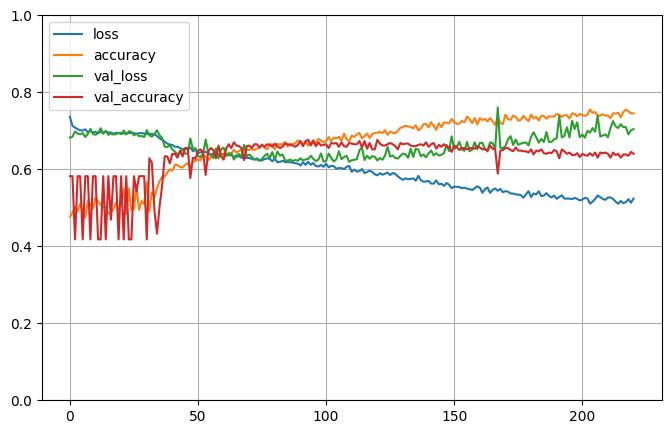


Testing # 1 1
2023-04-29 17:48:34.692361
PREDICT
Test 1:0 351:252 58.21%
Predict 1:0 400:203 66.33%
Test sizes (603, 1025) (603,)
Distrib of scores: 0.56716037 mean 0.19999 std
Range of scores: 0.018362386 to 0.8828624
Score threshold 0.5
Confusion matrix
 [[130 122]
 [ 73 278]]
Normalized matrix
 [[0.21558872 0.20232172]
 [0.12106136 0.46102819]]
Extreme scores correct, pos:neg 196 67
Extreme scores incorrect pos:neg 65 32


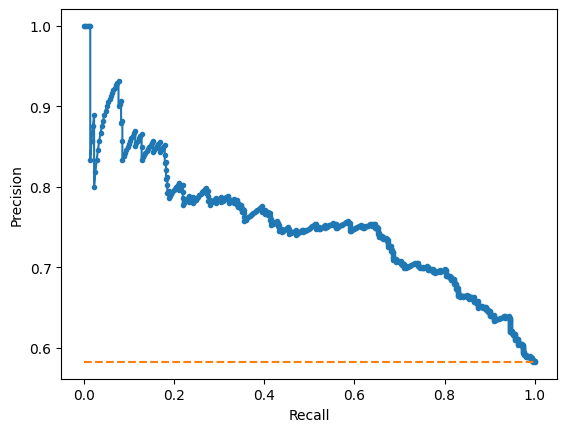

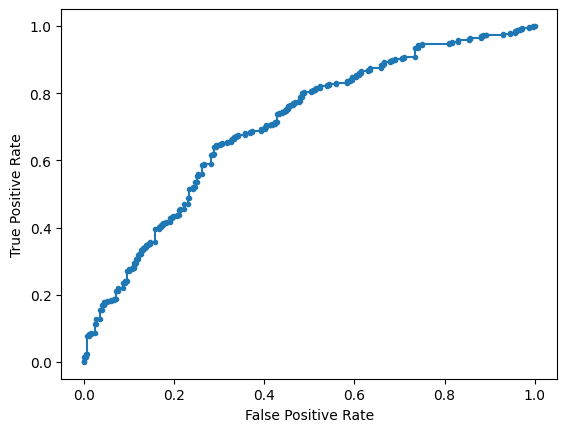

Accuracy: 67.66% Precision: 69.50% Recall: 79.20%
F1: 74.03% MCC: 0.3214
AUPRC: 75.23% AUROC: 70.57%
 accuracy [67.66169154228857]
 precision [69.5]
 recall [79.2022792022792]
 F1 [74.03462050599201]
 MCC [0.32135095128926056]
 AUPRC [75.2251049123934]
 AUROC [70.57160946049834]

Training # 1 2
2023-04-29 17:48:35.363462
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [0.39321351620723277, -1.4152915682536868]
Variances [1.59437221 1.57420958]
Priors [0.55568081 0.44431919]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1391:998 58.23%
Computed class weights: {0: 1.1968937875751502, 1: 0.8587347232207045}
Valid 1:0 351:242 59.19%
FIT


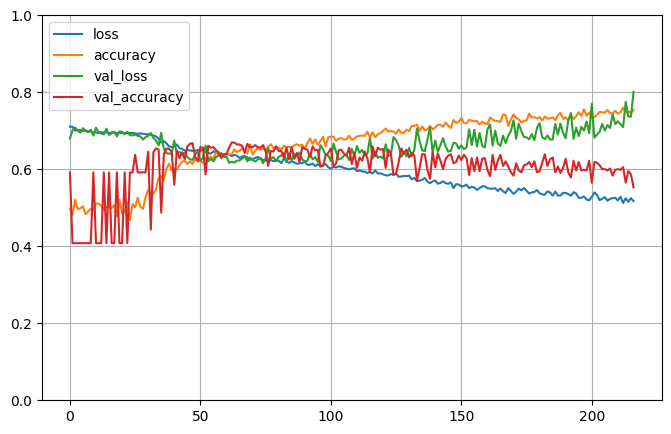


Testing # 1 2
2023-04-29 17:50:03.268979
PREDICT
Test 1:0 351:242 59.19%
Predict 1:0 417:176 70.32%
Test sizes (593, 1025) (593,)
Distrib of scores: 0.5727812 mean 0.19103992 std
Range of scores: 0.035093237 to 0.9316514
Score threshold 0.5
Confusion matrix
 [[108 134]
 [ 68 283]]
Normalized matrix
 [[0.18212479 0.22596965]
 [0.11467116 0.4772344 ]]
Extreme scores correct, pos:neg 178 68
Extreme scores incorrect pos:neg 72 27


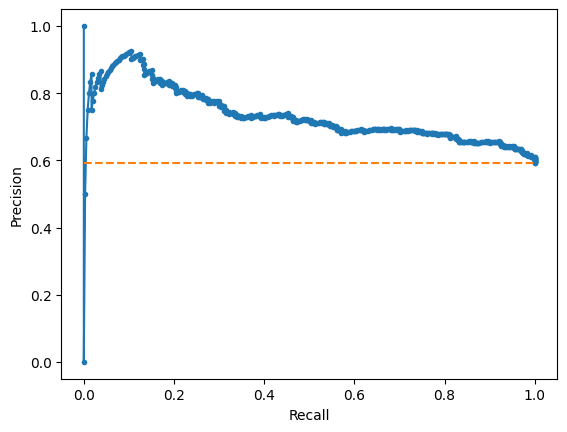

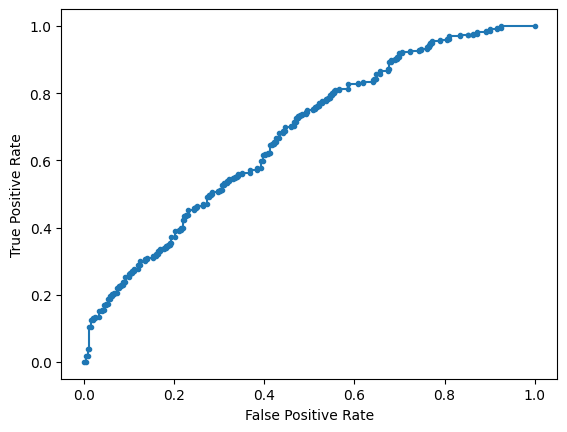

Accuracy: 65.94% Precision: 67.87% Recall: 80.63%
F1: 73.70% MCC: 0.2717
AUPRC: 73.22% AUROC: 67.34%
 accuracy [65.93591905564924]
 precision [67.86570743405275]
 recall [80.62678062678063]
 F1 [73.69791666666667]
 MCC [0.27169533751120706]
 AUPRC [73.22160709871754]
 AUROC [67.33535824444917]

Training # 1 3
2023-04-29 17:50:03.857340
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [0.40907207689802794, -1.465289302586859]
Variances [1.51550776 1.51368463]
Priors [0.5713906 0.4286094]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1461:939 60.88%
Computed class weights: {0: 1.2779552715654952, 1: 0.8213552361396304}
Valid 1:0 331:251 56.87%
FIT


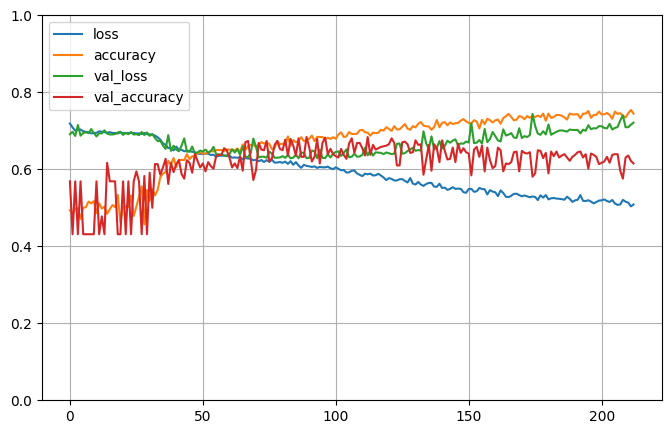


Testing # 1 3
2023-04-29 17:52:28.511103
PREDICT
Test 1:0 331:251 56.87%
Predict 1:0 431:151 74.05%
Test sizes (582, 1025) (582,)
Distrib of scores: 0.60967267 mean 0.19029942 std
Range of scores: 0.029842893 to 0.89595586
Score threshold 0.5
Confusion matrix
 [[109 142]
 [ 42 289]]
Normalized matrix
 [[0.18728522 0.24398625]
 [0.07216495 0.49656357]]
Extreme scores correct, pos:neg 217 53
Extreme scores incorrect pos:neg 98 20


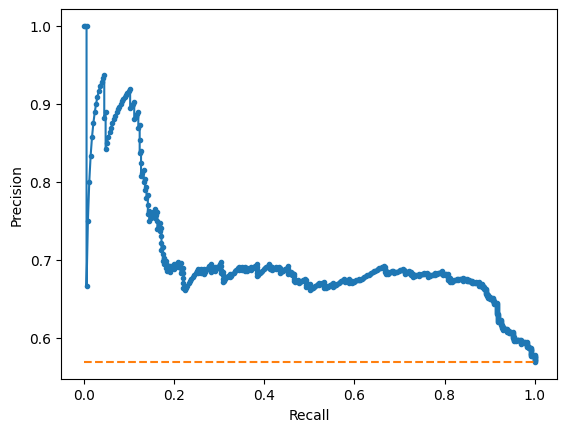

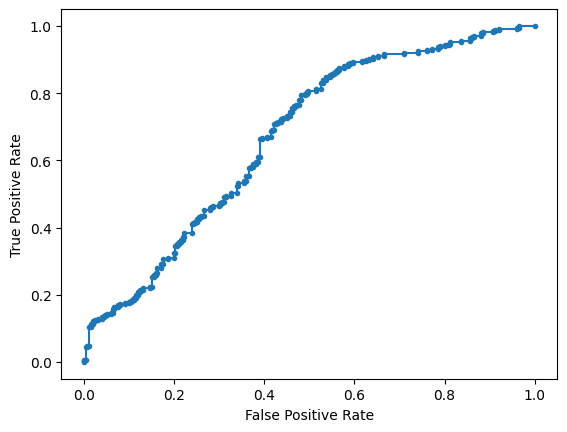

Accuracy: 68.38% Precision: 67.05% Recall: 87.31%
F1: 75.85% MCC: 0.3473
AUPRC: 70.30% AUROC: 67.05%
 accuracy [68.38487972508591]
 precision [67.05336426914154]
 recall [87.31117824773413]
 F1 [75.85301837270339]
 MCC [0.3472897056256343]
 AUPRC [70.2985608263344]
 AUROC [67.04902444602256]

Training # 1 4
2023-04-29 17:52:29.166311
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [0.41245694768976, -1.4630061329303885]
Variances [1.56688899 1.58956394]
Priors [0.5668711 0.4331289]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1433:950 60.13%
Computed class weights: {0: 1.2542105263157894, 1: 0.8314724354501046}
Valid 1:0 358:241 59.77%
FIT


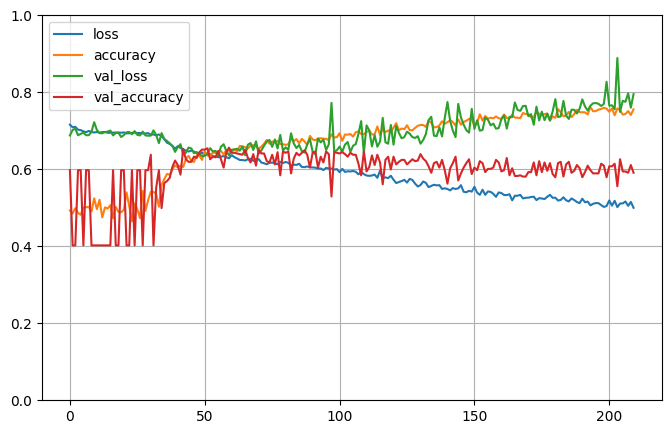


Testing # 1 4
2023-04-29 17:54:53.884640
PREDICT
Test 1:0 358:241 59.77%
Predict 1:0 428:171 71.45%
Test sizes (599, 1025) (599,)
Distrib of scores: 0.59403497 mean 0.1939282 std
Range of scores: 0.039244473 to 0.891094
Score threshold 0.5
Confusion matrix
 [[100 141]
 [ 71 287]]
Normalized matrix
 [[0.16694491 0.23539232]
 [0.11853088 0.47913189]]
Extreme scores correct, pos:neg 209 54
Extreme scores incorrect pos:neg 88 21


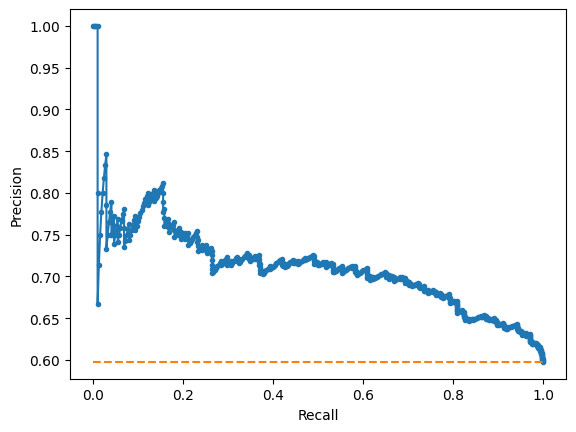

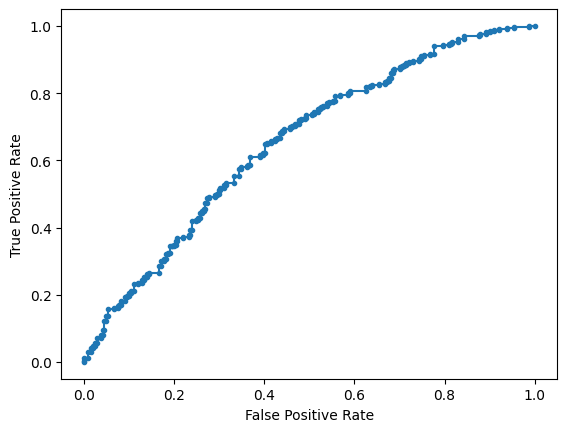

Accuracy: 64.61% Precision: 67.06% Recall: 80.17%
F1: 73.03% MCC: 0.2352
AUPRC: 71.08% AUROC: 65.36%
 accuracy [64.60767946577629]
 precision [67.05607476635514]
 recall [80.16759776536313]
 F1 [73.02798982188295]
 MCC [0.2351885040436577]
 AUPRC [71.07857806952838]
 AUROC [65.35965135955864]

Training # 1 5
2023-04-29 17:54:54.536585
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [-1.488985980127083, 0.36204973671170776]
Variances [1.57031374 1.48007307]
Priors [0.43555713 0.56444287]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1418:959 59.66%
Computed class weights: {0: 1.2393117831074036, 1: 0.8381523272214386}
Valid 1:0 392:213 64.79%
FIT


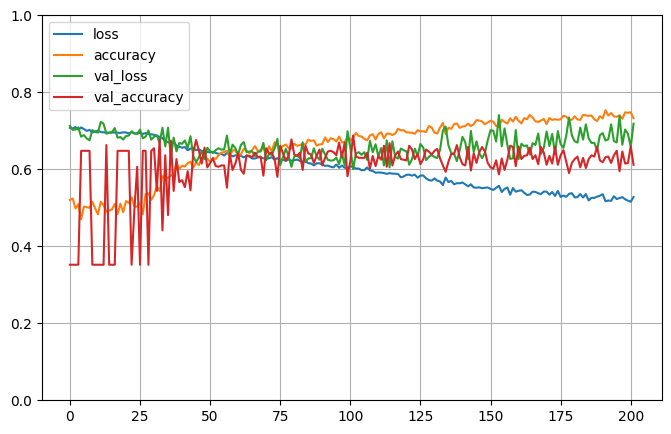


Testing # 1 5
2023-04-29 17:56:18.032285
PREDICT
Test 1:0 392:213 64.79%
Predict 1:0 455:150 75.21%
Test sizes (605, 1025) (605,)
Distrib of scores: 0.60246044 mean 0.17390256 std
Range of scores: 0.088274784 to 0.87067115
Score threshold 0.5
Confusion matrix
 [[ 87 126]
 [ 63 329]]
Normalized matrix
 [[0.14380165 0.20826446]
 [0.10413223 0.54380165]]
Extreme scores correct, pos:neg 223 44
Extreme scores incorrect pos:neg 76 24


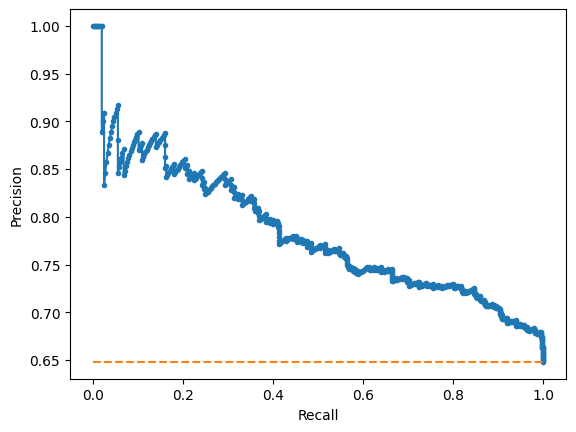

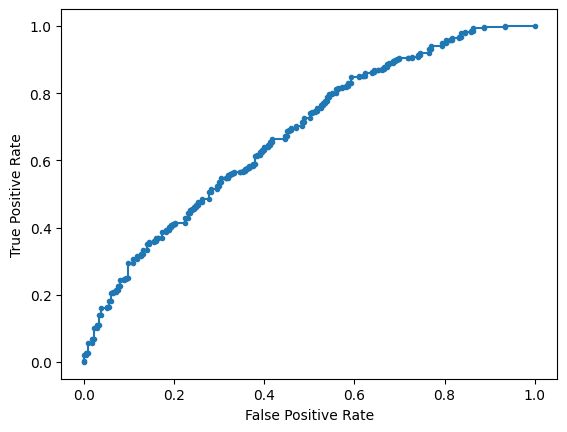

Accuracy: 68.76% Precision: 72.31% Recall: 83.93%
F1: 77.69% MCC: 0.2740
AUPRC: 78.25% AUROC: 67.86%
 accuracy [68.7603305785124]
 precision [72.3076923076923]
 recall [83.92857142857143]
 F1 [77.68595041322314]
 MCC [0.27401312278142975]
 AUPRC [78.24534242061685]
 AUROC [67.86193350579669]

Training # 2 1
2023-04-29 17:56:18.950697
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [0.4251310296777448, -1.464353283811784]
Variances [1.48626079 1.44551628]
Priors [0.5720307 0.4279693]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1437:941 60.43%
Computed class weights: {0: 1.2635494155154092, 1: 0.8274182324286709}
Valid 1:0 347:257 57.45%
FIT


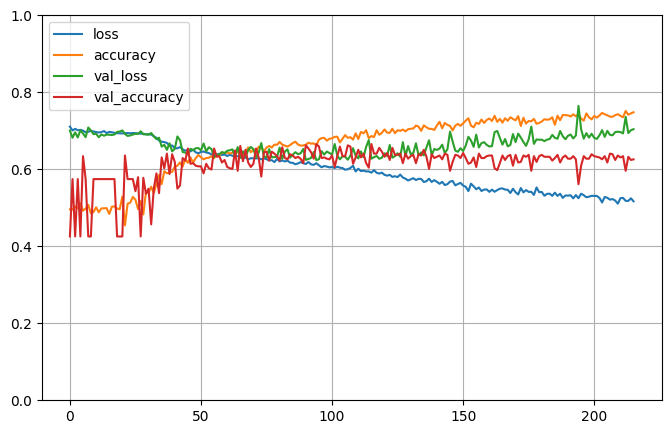


Testing # 2 1
2023-04-29 17:57:46.333488
PREDICT
Test 1:0 347:257 57.45%
Predict 1:0 445:159 73.68%
Test sizes (604, 1025) (604,)
Distrib of scores: 0.60294443 mean 0.18643227 std
Range of scores: 0.033514038 to 0.8898996
Score threshold 0.5
Confusion matrix
 [[107 150]
 [ 52 295]]
Normalized matrix
 [[0.17715232 0.24834437]
 [0.08609272 0.4884106 ]]
Extreme scores correct, pos:neg 211 54
Extreme scores incorrect pos:neg 93 17


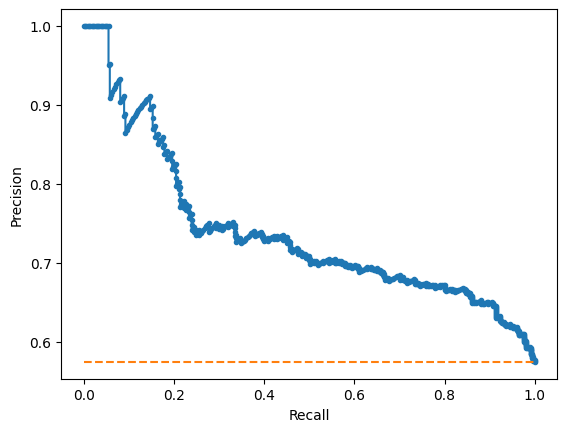

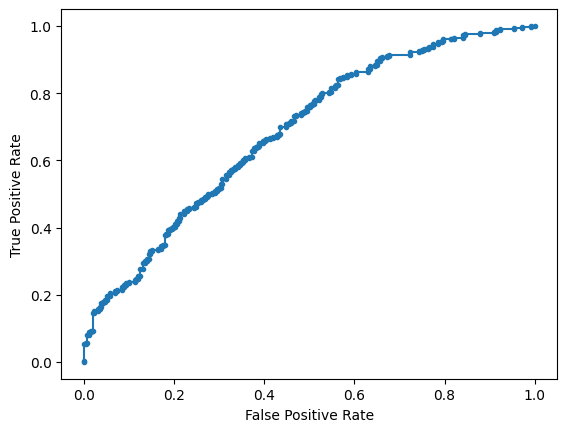

Accuracy: 66.56% Precision: 66.29% Recall: 85.01%
F1: 74.49% MCC: 0.2992
AUPRC: 73.88% AUROC: 68.49%
 accuracy [66.55629139072848]
 precision [66.29213483146067]
 recall [85.01440922190201]
 F1 [74.4949494949495]
 MCC [0.2991768270542573]
 AUPRC [73.88011220937724]
 AUROC [68.48921831372856]

Training # 2 2
2023-04-29 17:57:46.963917
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [0.3724246455927556, -1.5122954038128853]
Variances [1.54849273 1.52891538]
Priors [0.57970328 0.42029672]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1478:914 61.79%
Computed class weights: {0: 1.3085339168490153, 1: 0.8092016238159675}
Valid 1:0 364:226 61.69%
FIT


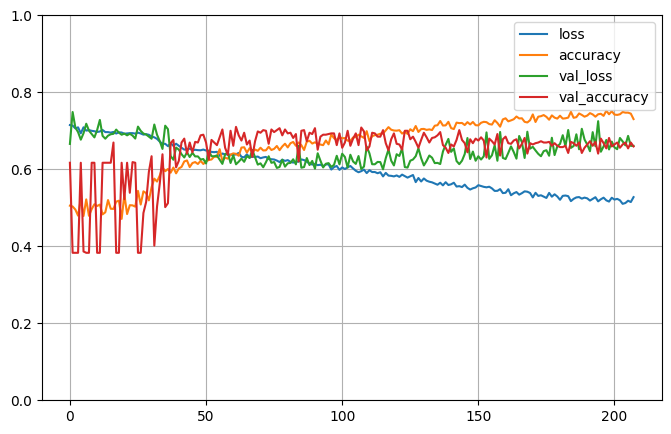


Testing # 2 2
2023-04-29 18:00:11.447562
PREDICT
Test 1:0 364:226 61.69%
Predict 1:0 404:186 68.47%
Test sizes (590, 1025) (590,)
Distrib of scores: 0.5678557 mean 0.19433877 std
Range of scores: 0.043936484 to 0.9015359
Score threshold 0.5
Confusion matrix
 [[120 106]
 [ 66 298]]
Normalized matrix
 [[0.20338983 0.17966102]
 [0.11186441 0.50508475]]
Extreme scores correct, pos:neg 193 63
Extreme scores incorrect pos:neg 57 29


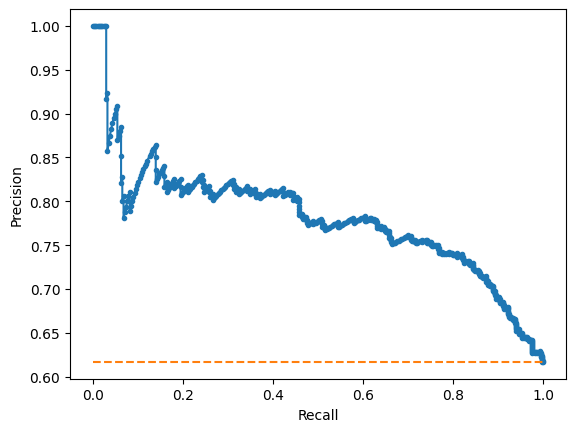

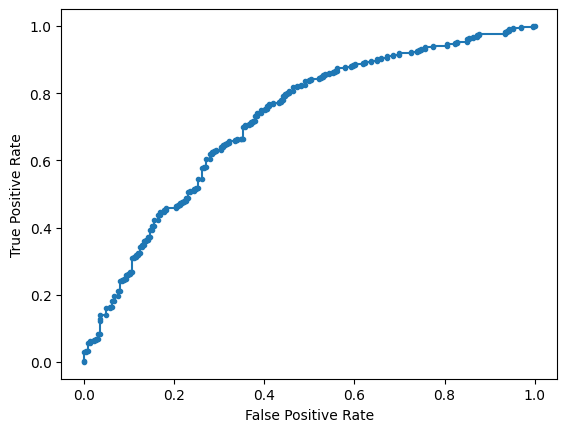

Accuracy: 70.85% Precision: 73.76% Recall: 81.87%
F1: 77.60% MCC: 0.3658
AUPRC: 78.09% AUROC: 71.92%
 accuracy [70.84745762711864]
 precision [73.76237623762376]
 recall [81.86813186813187]
 F1 [77.60416666666666]
 MCC [0.3658450759053529]
 AUPRC [78.08919259727382]
 AUROC [71.92453564134979]

Training # 2 3
2023-04-29 18:00:12.222182
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [0.40555670122899445, -1.4433631537163252]
Variances [1.5181444  1.62442123]
Priors [0.55511268 0.44488732]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1390:994 58.31%
Computed class weights: {0: 1.199195171026157, 1: 0.8575539568345324}
Valid 1:0 364:234 60.87%
FIT


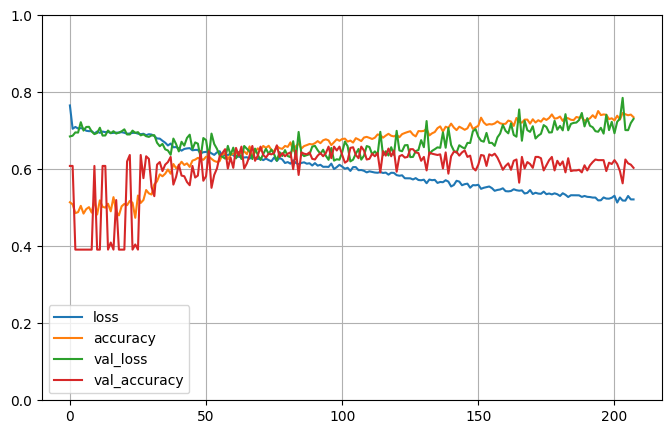


Testing # 2 3
2023-04-29 18:01:35.107470
PREDICT
Test 1:0 364:234 60.87%
Predict 1:0 408:190 68.23%
Test sizes (598, 1025) (598,)
Distrib of scores: 0.5697376 mean 0.19533299 std
Range of scores: 0.048218243 to 0.8903454
Score threshold 0.5
Confusion matrix
 [[110 124]
 [ 80 284]]
Normalized matrix
 [[0.18394649 0.20735786]
 [0.13377926 0.47491639]]
Extreme scores correct, pos:neg 194 63
Extreme scores incorrect pos:neg 67 33


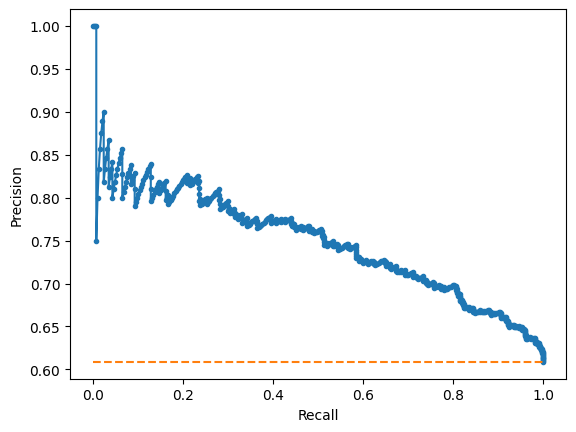

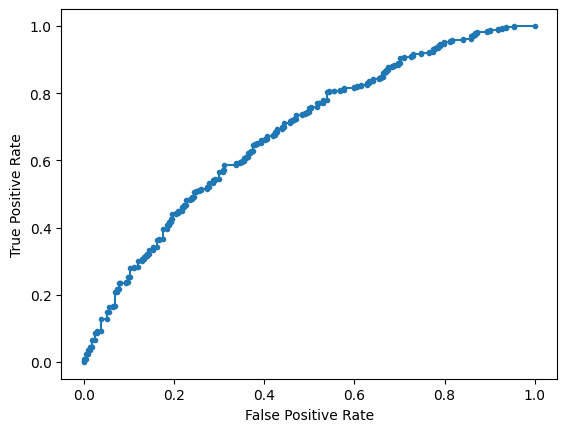

Accuracy: 65.89% Precision: 69.61% Recall: 78.02%
F1: 73.58% MCC: 0.2624
AUPRC: 74.87% AUROC: 68.17%
 accuracy [65.88628762541806]
 precision [69.6078431372549]
 recall [78.02197802197803]
 F1 [73.57512953367875]
 MCC [0.2623745446070162]
 AUPRC [74.86871685379215]
 AUROC [68.17413355874893]

Training # 2 4
2023-04-29 18:01:36.052163
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [0.39872987653846226, -1.4178979705195447]
Variances [1.60495034 1.6257418 ]
Priors [0.55493011 0.44506989]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1403:998 58.43%
Computed class weights: {0: 1.2029058116232465, 1: 0.8556664290805417}
Valid 1:0 345:236 59.38%
FIT


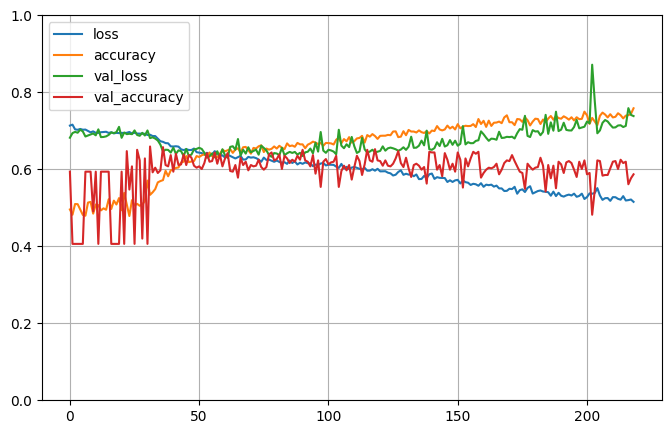


Testing # 2 4
2023-04-29 18:03:07.580298
PREDICT
Test 1:0 345:236 59.38%
Predict 1:0 417:164 71.77%
Test sizes (581, 1025) (581,)
Distrib of scores: 0.5960468 mean 0.1851816 std
Range of scores: 0.06555855 to 0.92970496
Score threshold 0.5
Confusion matrix
 [[ 99 137]
 [ 65 280]]
Normalized matrix
 [[0.17039587 0.23580034]
 [0.11187608 0.48192771]]
Extreme scores correct, pos:neg 190 53
Extreme scores incorrect pos:neg 92 20


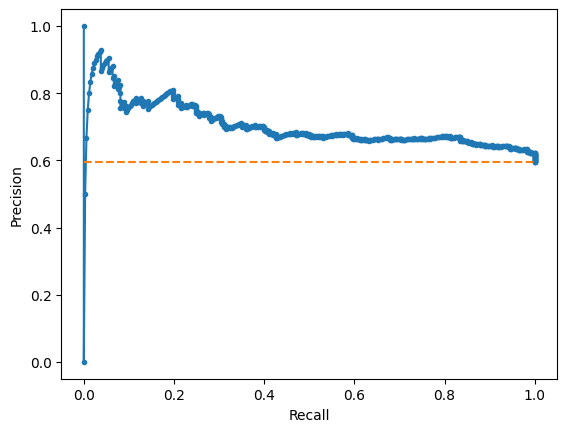

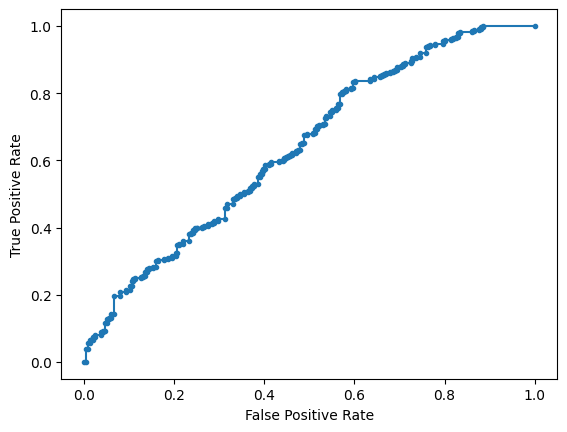

Accuracy: 65.23% Precision: 67.15% Recall: 81.16%
F1: 73.49% MCC: 0.2521
AUPRC: 70.19% AUROC: 63.97%
 accuracy [65.23235800344234]
 precision [67.14628297362111]
 recall [81.15942028985508]
 F1 [73.49081364829397]
 MCC [0.25214404873691204]
 AUPRC [70.19305946967052]
 AUROC [63.96585605502334]

Training # 2 5
2023-04-29 18:03:08.220707
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [0.3530356654919976, -1.489292428277836]
Variances [1.60652301 1.61718002]
Priors [0.58078045 0.41921955]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1475:898 62.16%
Computed class weights: {0: 1.3212694877505569, 1: 0.8044067796610169}
Valid 1:0 385:224 63.22%
FIT


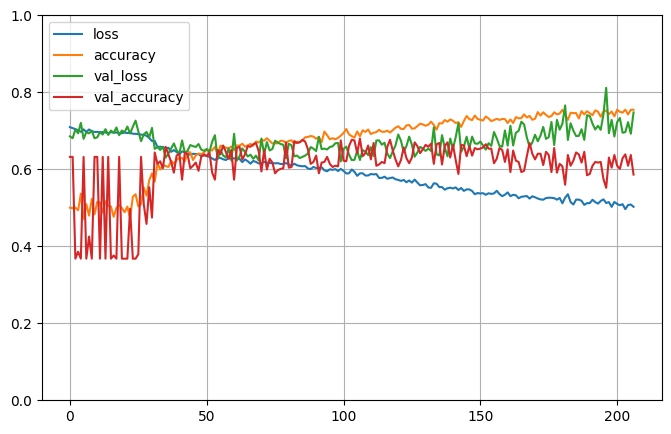


Testing # 2 5
2023-04-29 18:05:32.657211
PREDICT
Test 1:0 385:224 63.22%
Predict 1:0 434:175 71.26%
Test sizes (609, 1025) (609,)
Distrib of scores: 0.5913267 mean 0.18923266 std
Range of scores: 0.05546689 to 0.9111433
Score threshold 0.5
Confusion matrix
 [[102 122]
 [ 73 312]]
Normalized matrix
 [[0.16748768 0.20032841]
 [0.11986864 0.51231527]]
Extreme scores correct, pos:neg 209 50
Extreme scores incorrect pos:neg 70 32


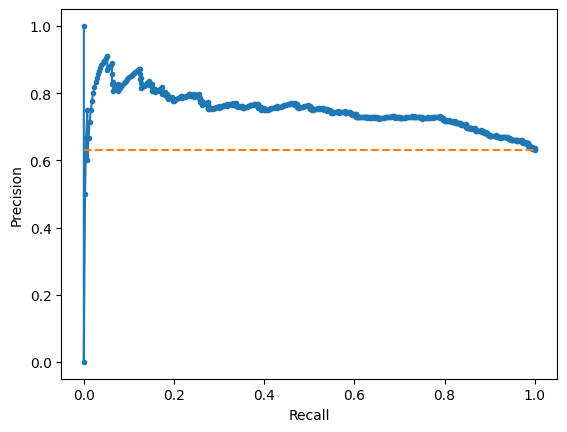

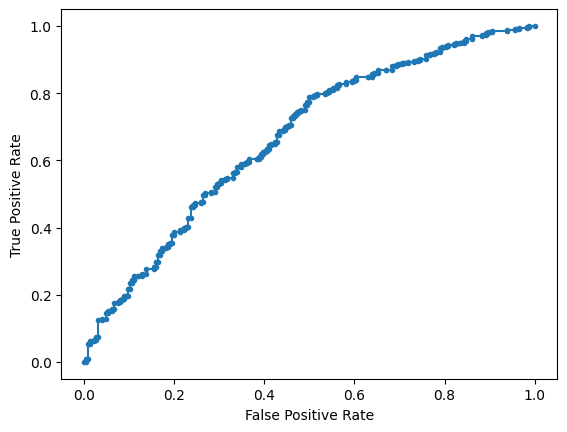

Accuracy: 67.98% Precision: 71.89% Recall: 81.04%
F1: 76.19% MCC: 0.2832
AUPRC: 74.93% AUROC: 66.81%
 accuracy [67.98029556650246]
 precision [71.88940092165899]
 recall [81.03896103896105]
 F1 [76.1904761904762]
 MCC [0.2831773100939794]
 AUPRC [74.93041995144982]
 AUROC [66.80890538033395]
2023-04-29 18:05:33.294509


In [6]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [7]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 67.19% std 1.89
 precision mean 69.25% std 2.62
 recall mean 81.83% std 2.81
 F1 mean 74.97% std 1.74
 MCC mean 0.2912 std 0.0421
 AUPRC mean 74.00% std 2.89
 AUROC mean 67.75% std 2.30
 accuracy [[67.66169154228857], [65.93591905564924], [68.38487972508591], [64.60767946577629], [68.7603305785124], [66.55629139072848], [70.84745762711864], [65.88628762541806], [65.23235800344234], [67.98029556650246]]
 precision [[69.5], [67.86570743405275], [67.05336426914154], [67.05607476635514], [72.3076923076923], [66.29213483146067], [73.76237623762376], [69.6078431372549], [67.14628297362111], [71.88940092165899]]
 recall [[79.2022792022792], [80.62678062678063], [87.31117824773413], [80.16759776536313], [83.92857142857143], [85.01440922190201], [81.86813186813187], [78.02197802197803], [81.15942028985508], [81.03896103896105]]
 F1 [[74.03462050599201], [73.69791666666667], [75.85301837270339], [73.02798982188295], [77.68595041322314], [74.4949494949495], [77.60416666666666], [73